Here, I define the many points on the cube. Therefore, I can calculate the distances between the center of sphere and the points on cube. If the cube and the sphere intersect with each other, some points' distance are shorter than the radius of sphere while some points' distance are longer than the radius of sphere. Therefore, I can use this feature to indentify whether the sphere and the cube intersect with each other.  

In [12]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
def cubic(r,vecx,vecy,vecz,phi,theta,psi,N):
    sr=np.zeros((N,N,N,3))
    sr1=np.zeros((N,N,N,3))
    A,B,C=np.mgrid[-r/2:r/2:N*1j, -r/2:r/2:N*1j, -r/2:r/2:N*1j]
    sr[:,:,:,0]=A
    sr[:,:,:,1]=B
    sr[:,:,:,2]=C
    cps=np.cos(psi)
    sps=np.sin(psi)
    cph=np.cos(phi)
    sph=np.sin(phi)
    ct=np.cos(theta)
    st=np.sin(theta)
    sr1[:,:,:,0]=(cps*cph-ct*sps*sph)*sr[:,:,:,0]+(cps*sph+ct*cph*sps)*sr[:,:,:,1]+(sps*st)*sr[:,:,:,2]
    sr1[:,:,:,1]=(-sps*cph-ct*cps*sph)*sr[:,:,:,0]+(-sps*sph+ct*cph*cps)*sr[:,:,:,1]+(cps*st)*sr[:,:,:,2]
    sr1[:,:,:,2]=(st*sph)*sr[:,:,:,0]+(-st*cph)*sr[:,:,:,1]+(ct)*sr[:,:,:,2]
    sr[:,:,:,0]=sr1[:,:,:,0]+vecx
    sr[:,:,:,1]=sr1[:,:,:,1]+vecy
    sr[:,:,:,2]=sr1[:,:,:,2]+vecz
    return sr

In [13]:
def cross(r2,r1,vecx,vecy,vecz,v1,v2,v3,phi,theta,psi,N): 
    rs=cubic(r1,vecx-v1,vecy-v2,vecz-v3,phi,theta,psi,N)
    n=0
    rs=np.reshape(rs,(N*N*N,3))
    for i in range(N*N*N):
        if np.sqrt(np.sum(rs[i,:]**2))>r2:
            n=n+1
    R=np.sqrt((vecx-v1)**2+(vecy-v2)**2+(vecz-v3)**2)
    print( n!=N*N*N)
    
    
def sphere(r,v1,v2,v3):
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = r*np.cos(u)*np.sin(v)+v1
    y = r*np.sin(u)*np.sin(v)+v2
    z = r*np.cos(v)+v3
    return x,y,z

True


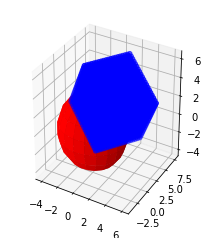

In [34]:
cross(5,6,5,5,5,0,0,0,np.pi/3,np.pi/2,np.pi/6,20)
rs=cubic(6,5,5,5,np.pi/3,np.pi/2,np.pi/6,20)
rs=np.reshape(rs,(20*20*20,3))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
x,y,z=sphere(5,0,0,0)
#ax.plot_surface(x, y, z, color="r")
#ax.scatter(rs[:,0], rs[:,1], rs[:,2], color="b")
ax.plot_surface(x, y, z, color="r")
ax.scatter(rs[:,0],rs[:,1],rs[:,2], color="b")
plt.show()

True


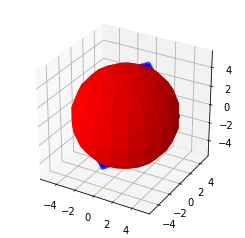

In [23]:
cross(5,6,1,2,3,0,0,0,np.pi/3,np.pi/2,np.pi/6,20)
rs=cubic(6,0,0,0,np.pi/3,np.pi/2,np.pi/6,20)
rs=np.reshape(rs,(20*20*20,3))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
x,y,z=sphere(5,0,0,0)
#ax.plot_surface(x, y, z, color="r")
#ax.scatter(rs[:,0], rs[:,1], rs[:,2], color="b")
ax.plot_surface(x, y, z, color="r")
ax.scatter(rs[:,0],rs[:,1],rs[:,2], color="b")
plt.show()

False


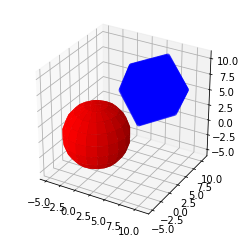

In [36]:
cross(5,6,6,6,6,0,0,0,np.pi/3,np.pi/2,np.pi/6,20)
rs=cubic(6,6,6,6,np.pi/3,np.pi/2,np.pi/6,20)
rs=np.reshape(rs,(20*20*20,3))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
x,y,z=sphere(5,0,0,0)
#ax.plot_surface(x, y, z, color="r")
#ax.scatter(rs[:,0], rs[:,1], rs[:,2], color="b")
ax.plot_surface(x, y, z, color="r")
ax.scatter(rs[:,0],rs[:,1],rs[:,2], color="b")
plt.show()